In [116]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

In [117]:
# Load your dataset
# Replace 'your_dataset.csv' with your actual dataset file
df = pd.read_csv('/content/KNN_Customer Churn_Dataset.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,testIndicator
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0


In [118]:
# Drop unnecessary columns
df = df.drop(['customerID', 'testIndicator'], axis=1)

In [119]:
# Encode the target variable 'Churn' into numerical values
label_encoder = LabelEncoder()
df['Churn'] = label_encoder.fit_transform(df['Churn'])

In [120]:
# Identify and one-hot encode categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [121]:
# Separate features (X) and target variable (y)
X = df.drop('Churn', axis=1)
y = df['Churn']

In [122]:
 # Handle missing values in features
imputer = SimpleImputer(strategy='mean')  # You can change the strategy as needed
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

In [123]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [124]:
# Initialize KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=3)

In [125]:
# Train the model
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [126]:
# Fit the KNeighborsClassifier model to the preprocessed data
knn_classifier = neighbors.KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X, y)

KNeighborsClassifier()

In [127]:
# Make predictions on the test set
y_pred = knn_classifier.predict(X_test)

In [128]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.85


In [129]:
# Display classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90      1036
           1       0.78      0.61      0.68       373

    accuracy                           0.85      1409
   macro avg       0.83      0.77      0.79      1409
weighted avg       0.85      0.85      0.85      1409



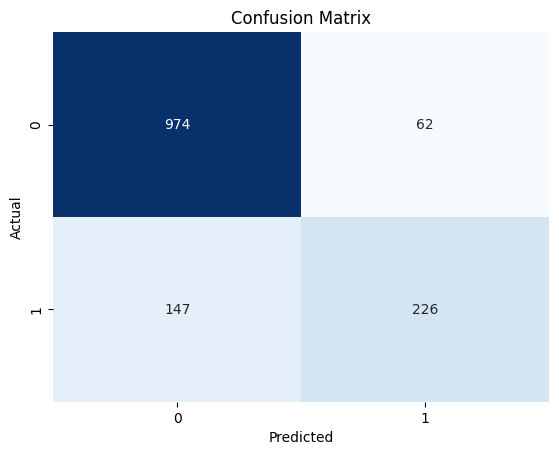

In [130]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

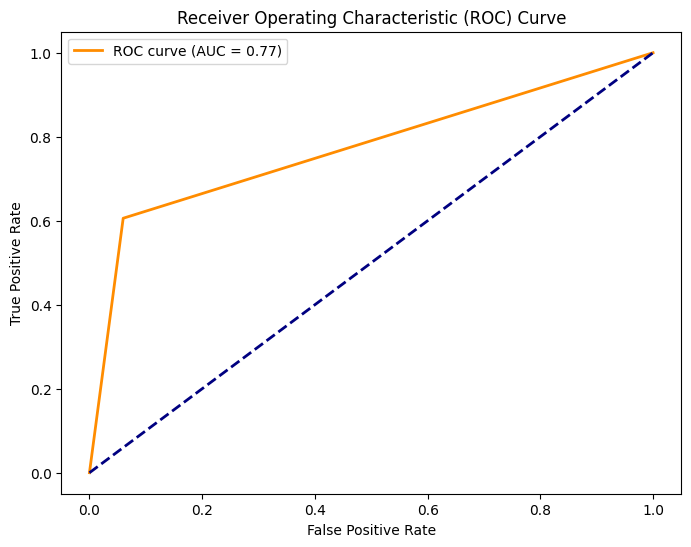

In [131]:
from sklearn.metrics import roc_curve, auc

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

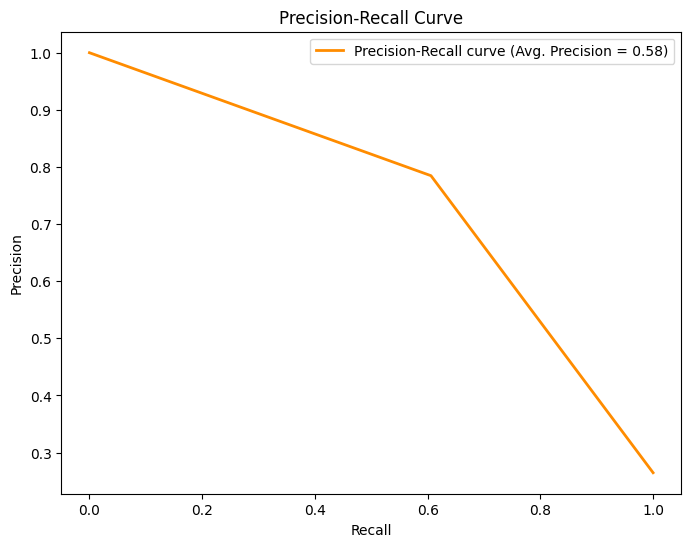

In [132]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Calculate Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred)
average_precision = average_precision_score(y_test, y_pred)

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='darkorange', lw=2, label=f'Precision-Recall curve (Avg. Precision = {average_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()